In this notebook, we will implement the positional embeddings from the original "Attention is all you need" paper, which employs absolute sinussoidal embeddings. Specifically, the embedding is a matrix of shape 𝐿×𝐷, where 𝐿 is the sequence length and 𝐷 is the embedding dimension, given by

$$
\textrm{PE}(p, i) = 
\begin{cases}
\sin{p C^{i / D}} && i \, \textrm{even} \\
\cos{p C^{(i-1) / D}} && i \, \textrm{odd} \\
\end{cases}
$$

where $C$ is a constant which is chosen as $C = 10^{-4}$ in the original paper. Here we assume that D is even. With this, we can also write this as

$$
\textrm{PE}(p, 2i) = \sin{p C^{2i / D}} 
$$
$$
\textrm{PE}(p, 2i+1) = \cos{p C^{2i / D}} 
$$


To code this in Python using PyTorch, we proceed as in the [D2L tutorial](http://d2l.ai/chapter_attention-mechanisms-and-transformers/self-attention-and-positional-encoding.html). First, we create a matrix whose entries are the values $p \cdot C^{i/D}$. Then, we apply the sine and cosine to this separately and then we copy this into even and odd indices of the target matrix.

In [1]:
import torch

In [2]:
def create_pos_embeddings(L = 6, D = 16, C = 1**(-4)):
    #
    # Values for p and 2*i / D
    #
    _p = torch.arange(L , dtype=torch.float32).unsqueeze(dim = 1)
    _i = torch.arange(0, D , step = 2) / D
    #
    # x = C**(2i/D)*p
    #
    x = torch.pow(C, _i) * _p
    #
    # Apply sine and cosine and organize into a matrix pe
    #
    pe = torch.zeros(L, D)
    pe[:, 0::2] = torch.sin(x)
    pe[:, 1::2] = torch.cos(x)
    return pe

L = 15
D = 16
C = 0.2 # usually much smaller
pe = create_pos_embeddings(L, D, C) 


Let us now verify that this gives the correct value by comparing it index for index.

In [3]:
import math
_pe = torch.zeros(L, D)
for p in range(L):
    for i in range(D // 2):
        _pe[p, 2*i] = math.sin(p * C**(2*i/D))
        _pe[p, 2*i + 1] = math.cos(p * C**(2*i/D))
assert torch.allclose(_pe, pe), "Values do not match"

It is interesting to plot the values of the positional embeddings to get a better intuition for what is going on. First, let us plot some vectors generated for different positions, chosen from p = 0, .. L-1.

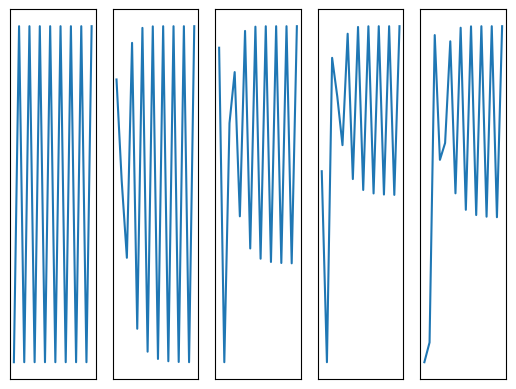

In [4]:
import matplotlib.pyplot as plt
pe = create_pos_embeddings(L = L, D = 16, C = 1/10000) 
samples = 5
fig, axs = plt.subplots(1, samples)
for p in range(samples):
    axs[p].set_xticks([])
    axs[p].set_yticks([])
    axs[p].plot(pe[p, :].tolist())


As expected, we see a rapid oscillation, caused by the forth and back between sine and cosine. Similarly, we can plot the behaviour if we fix a coordinate, i.e look at a projection of the space of embedding onto one coordinate, and vary the position, where we clearly see the shape of a sine respectively cosine wave, with a frequency that depends on the position.

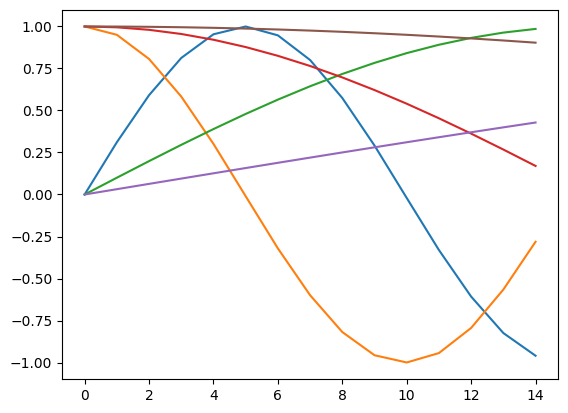

In [5]:
for i in range(2,8):
    plt.plot(pe[:, i].tolist())
